The dataset provided is a one and half years of customer's data from Santander bank spanning 2015-01-28 to 2016-06-28. 

The goal is to determine what products NEW customers will get from the bank in the period 2016-05-28 to 2016-06-28. 

#### Let us first load the modules and data required to understand the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\e0267844\OneDrive - National University of Singapore\KE5206\CA\bankMadridNew.csv', low_memory=False )
print("Dimensions of the dataset" , df.shape)

Dimensions of the dataset (190455, 48)


The columns are in Spanish we will rename columns for ease of understanding.

In [2]:
df.columns = ['Partition_id','customer_code','employee_index','customer_residence','customer_gender','customer_age','first_contract_date','new_customer_index','customer_seniority','customer_type','last_date_as_primary_customer','customer_type_month_beg','customer_relation_type','residence_index','foreigner_index','spouse_index','channel_used','deceased_index','address_type','province_code','province_name','activity_type','gross_income','segmentation','saving_Account','guarantees','current_Accounts','derivative_account','payroll_Account','junior_Account','joint_account','individual_Account','individual_Plus','short_term','medium_term','long_term','e_account','Funds','Mortgage','Pensions','Loans','Taxes','credit_Card','securities','home_Account','payroll','Pensions_2','direct_Debit']
df.head()

,Partition_id,customer_code,employee_index,customer_residence,customer_gender,customer_age,first_contract_date,new_customer_index,customer_seniority,customer_type,...,Mortgage,Pensions,Loans,Taxes,credit_Card,securities,home_Account,payroll,Pensions_2,direct_Debit
0,2015-01-28,1042509,N,ES,V,20,2012-08-03,1.0,3,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1014660,N,ES,H,32,2012-05-07,1.0,4,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1132935,N,ES,V,38,2013-05-03,1.0,2,1.0,...,0,0,0,0,0,0,0,NaN,NaN,0
3,2015-01-28,1110925,N,ES,V,29,2012-12-10,1.0,5,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1118340,N,ES,V,31,2013-01-17,1.0,3,1.0,...,0,0,0,0,0,0,0,NaN,NaN,0


### Missing Values check
The number of rows is quite large around 190k. We will assess if there are missing values and if they can be removed. 

In [3]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,column_name,missing_count
4,customer_gender,12
45,payroll,41
46,Pensions_2,41
11,customer_type_month_beg,27711
12,customer_relation_type,27711
23,segmentation,31507
16,channel_used,31599
22,gross_income,132357
10,last_date_as_primary_customer,187746
15,spouse_index,190391


#### Remove rows with null values 
Based on the values above, we remove rows where gross_income, channel_used, segmentation, customer_relation_type, customer_type_month_beg, pensions_2 and customer_gender is null.

In [4]:
dMadridNewCustomer = df[~df['gross_income'].isnull()] #Only rows where there is gross income
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['channel_used'].isnull()] #Only rows where there is channel used
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['segmentation'].isnull()] #Only rows where there is segementation data
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['customer_relation_type'].isnull()] # Only accounts with customer_relation_type data filled
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['customer_type_month_beg'].isnull()] # Only accounts with customer_type_month_beg data filled
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['payroll'].isnull()] # Only accounts with payroll data filled
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['Pensions_2'].isnull()] # Only accounts with payroll data filled
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['customer_gender'].isnull()] #Only rows where there is segementation data

# Only Living customers
dMadridNewCustomer = dMadridNewCustomer[dMadridNewCustomer['deceased_index'] == 'N']
# Only locals
dMadridNewCustomer = dMadridNewCustomer[dMadridNewCustomer['foreigner_index'] == 'N']
dMadridNewCustomer.shape

(47968, 48)

#### Get an understanding of the data types

In [5]:
dtype_df = dMadridNewCustomer.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,25
1,float64,8
2,object,15


#### Integer Columns Analysis

In [7]:
unique_values_dict = {}
for col in dMadridNewCustomer.columns:
    if col in dtype_df[dtype_df['Column Type'] == 'float64']['Count'].values:
        unique_value = str(dMadridNewCustomer[col].unique().tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Column:",columns ," containing the unique values : ",unique_val)
    print("--------------------------------------------------")
# customer_gender varón o hembra

Column: ['new_customer_index', 'address_type']  containing the unique values :  [1.0]
--------------------------------------------------
Column: ['customer_type']  containing the unique values :  [1.0, 99.0]
--------------------------------------------------
Column: ['province_code']  containing the unique values :  [28.0]
--------------------------------------------------
Column: ['activity_type']  containing the unique values :  [1.0, 0.0]
--------------------------------------------------
Column: ['gross_income']  containing the unique values :  [115323.6, 132283.65000000002, 93989.46, 79421.1, 72791.25, 306586.80000000005, 161914.65000000002, 142223.79, 203739.0, 58614.87, 247303.83, 125032.17, 86040.66, 127394.19, 498513.99, 80464.08, 190369.05, 241293.0, 243759.6, 174358.71, 122723.04, 192480.27, 411648.72, 71454.95999999999, 41169.66, 121820.07, 227501.19, 83725.77, 58472.91, 109380.38999999998, 172016.82, 105360.36000000002, 125420.13, 360318.09, 94448.64, 127310.97, 136813.77,

There are columns with one unique value, we can exclude from our modeling step. 
'saving_Account', 'guarantees', 'Loans', 'home_Account', province_code, new_customer_index, address_type

In [8]:
dAnalysis = dMadridNewCustomer.drop(['saving_Account', 'guarantees', 'Loans', 'home_Account','province_code'
                                     ,'new_customer_index','address_type'], 1) 

#### Categorical Columns Analysis

In [9]:
unique_values_dict = {}
for col in dMadridNewCustomer.columns:
    if col in dtype_df[dtype_df['Column Type'] == 'object']['Count'].values:
        unique_value = str(dMadridNewCustomer[col].unique().tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Column:",columns ," containing the unique values : ",unique_val)
    print("--------------------------------------------------")

Column: ['Partition_id']  containing the unique values :  ['2015-01-28', '2015-02-28', '2015-03-28', '2015-04-28', '2015-05-28', '2015-06-28', '2015-07-28', '2015-08-28', '2015-09-28', '2015-10-28', '2015-11-28', '2015-12-28', '2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28', '2016-05-28']
--------------------------------------------------
Column: ['employee_index', 'foreigner_index', 'deceased_index']  containing the unique values :  ['N']
--------------------------------------------------
Column: ['customer_residence']  containing the unique values :  ['ES']
--------------------------------------------------
Column: ['customer_gender']  containing the unique values :  ['V', 'H']
--------------------------------------------------
Column: ['first_contract_date']  containing the unique values :  ['2012-08-03', '2012-05-07', '2012-12-10', '2010-07-13', '2014-06-27', '2014-04-10', '2014-12-04', '2014-10-23', '2014-10-09', '2014-10-07', '2013-11-07', '2014-02-25', '2014-03-26', '2014

#### Remove categorial columns where there is only a single value or system indexes

In [11]:
# This is a system column is used within the database and is not required for analysis
# customer_residence, residence_index is a single value which just states S or Spain Customer's Country residence
# province_name has only madrid 
# Spouse is nan
# Only live and local customers 
# Remove date columns
dAnalysis = dAnalysis.drop(['Partition_id','customer_code', 'employee_index', 'foreigner_index', 'deceased_index'
                            ,'customer_residence','residence_index','spouse_index','province_name'
                           ,'first_contract_date','last_date_as_primary_customer'], 1) # Dates

#### One hot encoding is required for gender, segmentation, customer_relation_type, channel_used, customer_type_month_beg

In [39]:
cf = dAnalysis.select_dtypes(include=['object']).columns.values.tolist()
cf.remove('segmentation')
cf

['customer_gender',
 'customer_type_month_beg',
 'customer_relation_type',
 'channel_used']

In [40]:
# make one-hot-encoding convenient way - pandas.get_dummies(df) function
dummies = pd.get_dummies(
    dAnalysis[cf],
    drop_first = False # you can set it = True to ommit multicollinearity (crucial for linear models)
)

print('oh-encoded shape: {}'.format(dummies.shape))

# get rid of old columns and append them encoded
dAnalysisOH = pd.concat(
    [
        dAnalysis.drop(cf, axis=1), # drop old
        dummies # append them one-hot-encoded
    ],
    axis=1 # column-wise
)

print('appended-encoded shape: {}'.format(dAnalysisOH.shape))

oh-encoded shape: (47968, 21)
appended-encoded shape: (47968, 47)


## Change the segmentation values into integer

In [41]:
dAnalysis.groupby('segmentation').count()

,customer_gender,customer_age,customer_seniority,customer_type,customer_type_month_beg,customer_relation_type,channel_used,activity_type,gross_income,current_Accounts,...,e_account,Funds,Mortgage,Pensions,Taxes,credit_Card,securities,payroll,Pensions_2,direct_Debit
segmentation,,,,,,,,,,,,,,,,,,,,,
01 - TOP,6079,6079,6079,6079,6079,6079,6079,6079,6079,6079,...,6079,6079,6079,6079,6079,6079,6079,6079,6079,6079
02 - PARTICULARES,28017,28017,28017,28017,28017,28017,28017,28017,28017,28017,...,28017,28017,28017,28017,28017,28017,28017,28017,28017,28017
03 - UNIVERSITARIO,13872,13872,13872,13872,13872,13872,13872,13872,13872,13872,...,13872,13872,13872,13872,13872,13872,13872,13872,13872,13872


In [65]:
dAnalysisOH['segmentation_label'] = dAnalysisOH['segmentation'].apply(lambda x: x[1])
dAnalysisOH['segmentation_label'].value_counts().sort_index()
dAnalysisOH = dAnalysisOH.drop('segmentation', axis=1)

### Count the number of saving accounts each customer holds

In [15]:
dAnalysisOH['loans'] = dAnalysisOH.apply(lambda row: row.Mortgage + row.credit_Card + row.direct_Debit  + row.Taxes, axis=1)

### Collate the columns together for investments

In [16]:
dAnalysisOH['investments'] = dAnalysisOH.apply(lambda row: row.derivative_account + row.securities, axis=1)

### Sum total savings account

In [17]:
dAnalysisOH['savings'] = dAnalysisOH.apply (lambda row: row.payroll_Account
                                              + row.junior_Account + row.joint_account + row.individual_Account 
                                              + row.individual_Plus + row.short_term + row.medium_term + row.long_term 
                                              + row.e_account + row.Funds + row.Pensions 
                                              + row.payroll + row.Pensions_2   , axis=1)

# Data Understanding

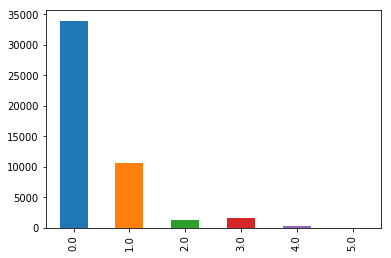

In [18]:
dAnalysisOH['savings'].value_counts().sort_index().plot(kind='bar')

In [19]:
dAnalysisOH['savings'].value_counts().sort_index()

0.0    33960
1.0    10719
2.0     1274
3.0     1691
4.0      294
5.0       30
Name: savings, dtype: int64

In [20]:
dAnalysisOH['savings_N'] = dAnalysisOH['savings']

In [21]:
dAnalysisOH['savings_N'] = dAnalysisOH['savings'].apply(lambda x: 1 if x > 0 else 0)
dAnalysisOH['savings_N'].value_counts().sort_index()

0    33960
1    14008
Name: savings_N, dtype: int64

### Current Account

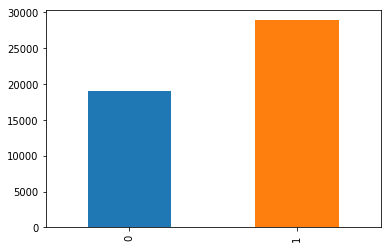

In [22]:
dAnalysisOH['current_Accounts'].value_counts().sort_index().plot(kind='bar')

In [23]:
dAnalysisOH['savings'].value_counts().sort_index()

0.0    33960
1.0    10719
2.0     1274
3.0     1691
4.0      294
5.0       30
Name: savings, dtype: int64

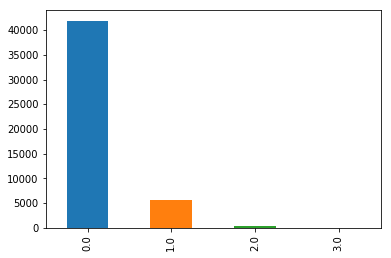

In [24]:
dAnalysisOH['loans'].value_counts().plot(kind='bar')

In [25]:
dAnalysisOH['loans'].value_counts()

0.0    41871
1.0     5738
2.0      334
3.0       25
Name: loans, dtype: int64

In [26]:
dAnalysisOH['loans_N'] = dAnalysisOH['loans']
dAnalysisOH['loans_N'] = dAnalysisOH['loans'].apply(lambda x: 1 if x > 0 else 0)
dAnalysisOH['loans_N'].value_counts().sort_index()

0    41871
1     6097
Name: loans_N, dtype: int64

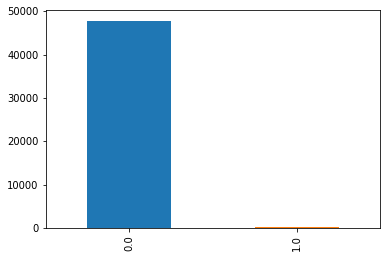

In [27]:
dAnalysisOH['investments'].value_counts().plot(kind='bar')

In [28]:
dAnalysisOH['investments'].value_counts()

0.0    47768
1.0      200
Name: investments, dtype: int64

## Can a customer be in more than one category?

In [38]:
dAnalysisOH.groupby(['current_Accounts','savings_N', 'investments', 'loans_N',]).count()

customer_age  \
current_Accounts savings_N investments loans_N                 
0                0         0.0         0               10580   
                                       1                 187   
                           1.0         0                   1   
                 1         0.0         0                7136   
                                       1                1162   
                           1.0         0                   5   
                                       1                   7   
1                0         0.0         0               18902   
                                       1                4153   
                           1.0         0                 103   
                                       1                  34   
                 1         0.0         0                5115   
                                       1                 533   
                           1.0         0                  29   
                                       1                  21   

                                                customer_seniority  \
current_Accounts savings_N investments loans_N                       
0                0         0.0         0                     10580   
                                       1                       187   
                           1.0         0                         1   
                 1         0.0         0                      7136   
                                       1                      1162   
                           1.0         0                         5   
                                       1                         7   
1                0         0.0         0                     18902   
                                       1                      4153   
                           1.0         0                       103   
                                       1                        34   
                 1         0.0         0                      5115   
                                       1                       533   
                           1.0         0                        29   
                                       1                        21   

                                                customer_type  activity_type  \
current_Accounts savings_N investments loans_N                                 
0                0         0.0         0                10580          10580   
                                       1                  187            187   
                           1.0         0                    1              1   
                 1         0.0         0                 7136           7136   
                                       1                 1162           1162   
                           1.0         0                    5              5   
                                       1                    7              7   
1                0         0.0         0                18902          18902   
                                       1                 4153           4153   
                           1.0         0                  103            103   
                                       1                   34             34   
                 1         0.0         0                 5115           5115   
                                       1                  533            533   
                           1.0         0                   29             29   
                                       1                   21             21   

                                                gross_income  \
current_Accounts savings_N investments loans_N                 
0                0         0.0         0               10580   
                                       1                 187   
                           1.0         0                   1   
                 1         0.0         0                7136   
                       

### Lets now setup the basic SVM classifier

## Model

The training to test set ratio will be set to 70% to 30%

In [84]:
testSize = 0.3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dAnalysisOH, dAnalysisOH.segmentation_label, test_size= testSize)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC, SVC

(33577, 47) (33577,)
(14391, 47) (14391,)


In [87]:
# One vs All
ovr = LinearSVC(C=100,multi_class='ovr', penalty='l2',class_weight=None, random_state=8) #C Penalty parmetre
ovr.fit(X_train,y_train)
score = ovr.score(X_test,y_test )
print ('LinearSVC Score\n', score)

LinearSVC Score
 0.584948926412


In [ ]:
list(dAnalysisOH)

In [ ]:
# One vs One
ovo = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=5, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)
ovo.fit(X_train,y_train)
score = ovo.score(X_test,y_test )
print ('SVC RBF Score\n', score)

### Investments

In [31]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
ovr = OneVsRestClassifier(LinearSVC(C=100.))
ovr.fit(X_train,y_train)
score = ovr.score(X_test,y_test )
print ('Investment Score\n', score)

Investment Score
 0.995761239664


### Savings

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dAnalysisOH, dAnalysisOH.savings_N, test_size= testSize)

In [34]:
ovr.fit(X_train,y_train)
score = ovr.score(X_test,y_test )
print ('Savings Score\n', score)

Savings Score
 0.708150927663


### Current Account

In [521]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dAnalysisOH, dAnalysisOH.current_Accounts, test_size= testSize)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(33577, 54) (33577,)
(14391, 54) (14391,)


In [522]:
ovr.fit(X_train,y_train)
score = ovr.score(X_test,y_test )
print ('Current Score\n', score)

Current Score
 0.602946285873


### Loans

In [523]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dAnalysisOH, dAnalysisOH.loans_N, test_size= testSize)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(33577, 54) (33577,)
(14391, 54) (14391,)


In [507]:
ovr.fit(X_train,y_train)
score = ovr.score(X_test,y_test )
print ('Loans Score\n', score)

Loans Score
 0.870022930999
